In [11]:
%run "../common.ipynb"

## Estimation


Suppose if we have a population with some parameters $\mu$ and standard deviation $\sigma$;
<br/> If we take many samples of size $n$ and compute the average of these random samples and plot the sample means,
<br/> We get a normal distribution with mean same as population mean $\mu$ and standard deviation of the sample distribution 
called as **Standard Error** (SE) = $\frac{\sigma}{\sqrt{n}}$
<br/> This is known as **Central Limit Theorem**

**NOTE** The standard distribution of sampling distribution is also called as **Standard Error** denoted by SE.

No suppose we conduct an experiment by treating a sample of size $n$ taken from a population with mean $\mu$ and standard deviation $\sigma$ and get an estimate of $\bar x$
<br/> then, we cannot say if we apply the treatment to the entire population, the population mean will be $\bar x$.
<br/> We may have gotten this $\bar x$ by chance. Therefore, it is fair to assume that $\bar x$ is one of the 

## Standarding/Normal Distribution

Z values of $x$ is $$Z = \frac{x-\mu}{\sigma}$$ 

**Problem** : Average height of a basketball player is 2.00 with $\sigma = 0.02$. If a player named *Harrison* is 2.03. How may standard deviation is *Harrison's* height?

**Answer**: $Z = \frac{x-\mu}{\sigma} = \frac{2.03-2.00$}{0.02}$


By standardizing, we know far or closer a value lies in standard curve. If $z$ value is close to zero, then it is near the average. 
<br/> If $z$ value is 1 then we know it is 1 standard deviation away and with in 68% of the population. 

<hr>

### Illustration

Kate has 63 Facebook friends; average number of facebook friends in general are $190$ with $\sigma_f = 36$. 
<br>
Dale has 54 twitter followers; average number twitter followers for all is 208 with $\sigma_t = 60$.
<br/>
They both seem to have much less friends than average. Who is more unpopular.

**==>**
<br/>
If we just look at the numbers Kate = 63 and Dale = 54; Could we say Dale he is more unpopular?
<br/> *That argument is wrong since the averages from the population the numbers are taken differ.*

Now, by comparing to averages, Kate has $190 - 63 = 127$ (about $\frac{63}{190} = 33$%)less friends than the average 
<br/> compared to Dale who has $208-54 = 151$ ( about $\frac{54}{208} = 26$%) less than the average.
<br/> Again, using this logic Dale seem to unpopular
<br/> *(Again the argument don't hold because the standard deviations differ)*

Finally, lets consider the standard deviation.
The $z$ score for Kate is $\frac{63 - 190}{36} = 3.52 $
<br>
The $z$ score for Dale is $\frac{54 - 208}{60} = 2.56 $

Kate is too far away from the mean, much more than Dale. Therefore, Kate is more unpopular.


## Normal Distribution

** Probability Distribution function (PDF) **


<img src="imgs/normald.png" style="width: 30%;" class="imgs1" >
It is called PDF, "Density" because the area (the density) shows the probability. 

For example: the area between $-1\sigma$ and $1\sigma$ is about 68.2%
Therefore, the probability of getting a value between $-1\sigma$ and $1\sigma$ is about 68.2%

We can find the probability between any two points either using calculus or looking up $z-$ table

ANother example: If someone has a score of x whose z-value is 0 (same as mean) then that score is in 50th percentile.


In [39]:
c = open('..//data//churn.csv');

In [40]:
for i, l in enumerate(c):
    print (i, ": ", l, sep='', end='');
    if ( i >= 4): 
        break;

#c.close;

0: State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1: KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
2: OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
3: NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
4: OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.


In [50]:
import sys;
print( sys.argv)

['c:\\anaconda3\\lib\\site-packages\\ipykernel\\__main__.py', '-f', 'C:\\Users\\sadan\\AppData\\Roaming\\jupyter\\runtime\\kernel-0b76f465-0bf1-4348-abe4-fc4d3a9e1c69.json']


In [144]:
l='''Reload a previously imported module. The argument must be a module object, so it must have been successfully imported before. This is useful if you have edited the module source file using an external editor and want to try out the new version without leaving the Python interpreter. The return value is the module object (the same as the module argument).

When reload(module) is executed:

Python modules’ code is recompiled and the module-level code reexecuted, defining a new set of objects which are bound to names in the module’s dictionary. The init function of extension modules is not called a second time.
As with all other objects in Python the old objects are only reclaimed after their reference counts drop to zero.
The names in the module namespace are updated to point to any new or changed objects.
Other references to the old objects (such as names external to the module) are not rebound to refer to the new objects and must be updated in each namespace where they occur if that is desired.
There are a number of other caveats:

When a module is reloaded, its dictionary (containing the module’s global variables) is retained. Redefinitions of names will override the old definitions, so this is generally not a problem. If the new version of a module does not define a name that was defined by the old version, the old definition remains. This feature can be used to the module’s advantage if it maintains a global table or cache of objects — with a try statement it can test for the table’s presence and skip its initialization if desired:'''

In [145]:
c = Counter(l)
c.most_common(10)

In [148]:
l='''It is generally not very useful to reload built-in or dynamically loaded modules. Reloading sys, __main__, builtins and other key modules is not recommended. In many cases extension modules are not designed to be initialized more than once, and may fail in arbitrary ways when reloaded.

If a module imports objects from another module using from ... import ..., calling reload() for the other module does not redefine the objects imported from it — one way around this is to re-execute the from statement, another is to use import and qualified names (module.*name*) instead.

If a module instantiates instances of a class, reloading the module that defines the class does not affect the method definitions of the instances — they continue to use the old class definition. The same is true for derived classes.

repr(object)
Return a string containing a printable representation of an object. This is the same value yielded by conversions (reverse quotes). It is sometimes useful to be able to access this operation as an ordinary function. For many types, this function makes an attempt to return a string that would yield an object with the same value when passed to eval(), otherwise the representation is a string enclosed in angle brackets that contains the name of the type of the object together with additional information often including the name and address of the object. A class can control what this function returns for its instances by defining a __repr__() method.

reversed(seq)
Return a reverse iterator. seq must be an object which has a __reversed__() method or supports the sequence protocol (the __len__() method and the __getitem__() method with integer arguments starting at 0).

New in version 2.4.

Changed in version 2.6: Added the possibility to write a custom __reversed__() method.

round(number[, ndigits])
Return the floating point value number rounded to ndigits digits after the decimal point. If ndigits is omitted, it defaults to zero. The result is a floating point number. Values are rounded to the closest multiple of 10 to the power minus ndigits; if two multiples are equally close, rounding is done away from 0 (so, for example, round(0.5) is 1.0 and round(-0.5) is -1.0).'''

In [149]:
c = Counter(l)
c.most_common(10)

[(' ', 350),
 ('e', 222),
 ('t', 175),
 ('o', 139),
 ('n', 136),
 ('i', 128),
 ('s', 124),
 ('a', 116),
 ('r', 101),
 ('d', 85)]

In [138]:
l=[1,2,3]

In [201]:
class A:
    id = 0;
    def __init__(self):
        self.id  = A.id + 1;
        A.id += 1;
    def __del__(self):
        print ("Delete called for ", self.id)
        
    def dump(self):
        print("id: {} {}".format(self.id, self.getName()))
        
    def getName(self): 
        return "pass"

A.name = "Sada";
a = A()
a.dump()

id: 1 pass


In [244]:
b = A()
b.dump()

id: 5 pass


In [246]:
n = int(input("Number: "))

Number: 5


In [255]:
Fn  = lambda x: x if (x == 0 or  x == 1) else Fn(x-1) + Fn(x-2);

In [256]:
[pow(Fn(i),3) for i in range(n)]

[0, 1, 1, 8, 27]

In [253]:
pow(2,3)

8

In [264]:
n = int(input("Number: "))
es =[];
for i in range(n):
    es.append(input())
for e in es:
    

Number: 3
sada@microsoft.com
daya@nhsd.com
tyuyu@kdsjf23^&^&.com


['sada@microsoft.com', 'daya@nhsd.com', 'tyuyu@kdsjf23^&^&.com']

In [261]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
N = int(input())
A = [0,1]
for i in range(2,N): A.append(A[i-1]+A[i-2])        
print( list(map(lambda a: a*a*a,A)) )


5
[0, 1, 1, 8, 27]


In [276]:
def valid(em):
    w = em.split('@')
    if (len(w) != 2):
        return False;
    u = w[0];
    w = w.split('.')
    if (len(w) != 2):
        return False;
    a = w[0]
    e = w[1]
    
    

In [277]:
print (
    valid('daya@nhsd.com'),
    valid('dayanhsd.com'),
    valid('daya@nhsd.com@.HDD')
    )

None False False


In [332]:
em = 'daya@nhsd.com'
#r= re.match(r'([\w\d-_]+)@([\A\D]+)\.\w\w\w', em)
r= re.match(r'([\D\d\-]+?)@([A-Za-z0-9]+)\.(\w?\w?\w)$', em)
if ( r is None ):
    print ("No Match");
else:
    print (r.groups())


('daya', 'nhsd', 'com')


In [314]:
re.search(r'^[\w\d-]+@[A-Za-z0-9]+\.\w?\w?\w$',em)

<_sre.SRE_Match object; span=(0, 13), match='daya@nhsd.com'>

In [329]:
E=['sada@fdsdfs.com', 'daya@23232.comf', '@dfdf.com', 'sdasdas_@fsd.com']
list(filter(lambda x: re.match(r'^[\w\d-]+@[A-Za-z0-9]+\.\w?\w?\w$',x), E))

['sada@fdsdfs.com', 'sdasdas_@fsd.com']

In [344]:
def f(*a, **kwargs):
    for i in a:
        print (i);
    for k,v in kwargs.items():
        print (k,v)
        
f(2,3,'sada', n= 4, u=8)

2
3
sada
u 8
n 4


In [345]:
from itertools import product

In [347]:
list(product([1,2],[3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [366]:
a=input()
b=input()
A= map(int,a.split())
B= map(int,b.split())
for j in product(A,B):
    print (j, end=' ')



1 2
3 4
(1, 3) (1, 4) (2, 3) (2, 4) 

('1', '3')('1', '4')('2', '3')('2', '4')

In [364]:
i=map(int,A) 
j=map(int,B)
list(product(i,j))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [394]:
from itertools import permutations
w, n = input().split()
for k in permutations(sorted(w), int(n)):
    print ("".join(k))

ABCA 2
AA
AB
AC
AA
AB
AC
BA
BA
BC
CA
CA
CB


In [403]:
l1=10
l2='2 3 4 5 6 8 7 6 5 18'
l3=6
l4=(6,55)
l5=(6, 45)
l6=(6, 55)
l7=(4, 40)
l8=(18, 60)
l9=(10, 50)
ll=[l4,l5,l6,l7,l8,l9]

In [412]:
c=Counter(map(int,l2.split()))

In [413]:
t=0;
for  l in ll:
    if (c[l[0]] > 0):
        c[l[0]] -= 1;
        t += l[1]
    print (c)
print (t)

Counter({5: 2, 2: 1, 3: 1, 4: 1, 6: 1, 7: 1, 8: 1, 18: 1})
Counter({5: 2, 2: 1, 3: 1, 4: 1, 7: 1, 8: 1, 18: 1, 6: 0})
Counter({5: 2, 2: 1, 3: 1, 4: 1, 7: 1, 8: 1, 18: 1, 6: 0})
Counter({5: 2, 2: 1, 3: 1, 7: 1, 8: 1, 18: 1, 4: 0, 6: 0})
Counter({5: 2, 2: 1, 3: 1, 7: 1, 8: 1, 4: 0, 6: 0, 18: 0})
Counter({5: 2, 2: 1, 3: 1, 7: 1, 8: 1, 4: 0, 6: 0, 18: 0})
200


In [430]:
a=set( map(int,'161 182 161 154 176 170 167 171 170 174'.split()) )
s=np.sum(list(a))
s/len(a)

169.375

In [4]:
%load_ext rpy2.ipython

/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Read 470 items

  warnings.warn(x, RRuntimeWarning)


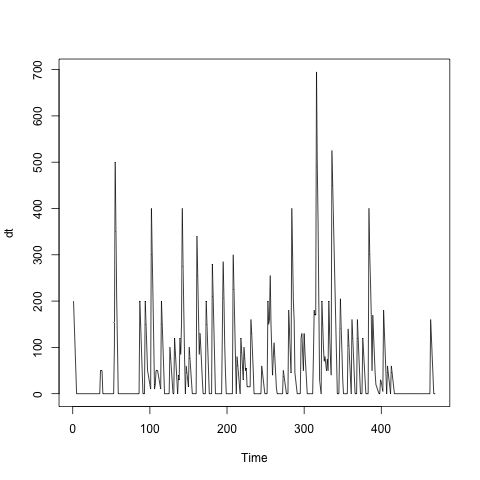

In [17]:
%%R 
require(ggplot2)
url="http://robjhyndman.com/tsdldata/annual/dvi.dat"
skip =1
d=  scan(url, skip=skip)
dt = ts(d) # Convert to time series
plot(dt)